# A Quick Tutorial of det_rnn 

+ `det_rnn` is a framework that unifies the input-output repertoire for the **Delayed Estimation Task(DET)**(or delayed go task). 

## 1. load det_rnn
+ Append the parent directory of det_rnn to package path

In [1]:
import os,sys
# method 1. use the server path directly
# sys.path.append("/Volumes/Data_CSNL/project/RNN_study/") 

# method 2. use the server path directly
## First, clone the repo "/Volumes/Data_CSNL/project/RNN_study/det_rnn/" to a local path
## Second, append to python the parent path of the local path
sys.path.append("/Users/hyunwoogu/Dropbox/CSNL/Projects/RNN/neuroRNN/rnn/det/")  

# load det_rnn
from det_rnn import par, update_parameters # necessary
from det_rnn import Stimulus # necessary
from det_rnn import Model    # unnecessary

## 2. Structure of det_rnn

The necessary parts of `det_rnn` are `_parameters.py` and `_stimulus.py`. It is strongly recommended not to modify any major part of the two `python` files.

**Necessary parts**
+ `_parameters.py` contains a set of parameters mainly inherited from **Masse et al.(2019)** and **Yang et al.(2019)**.
+ `_stimulus.py` contains `generate_trial`, which generates a dictionary that contains neural input, desired output, and mask.
+ `__init__.py` contains lower level information
+ `_functions.py` contains lower level functions

**Unnecessary parts**
+ `_model.py` contains `Model()` class, which fits an example RNN.

In [2]:
_file_list = os.listdir("/Users/hyunwoogu/Dropbox/CSNL/Projects/RNN/neuroRNN/rnn/det/det_rnn/")
print([_file for _file in _file_list if '.py' in _file ])

['_stimulus.py', '_functions.py', '__init__.py', '_parameters.py', '_model.py']


## 3. Use det_rnn

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

### 3.1. Default Use

+ Step 1. Always update parameters first
+ Step 2. Define classes : `Stimulus` based on the updated parameter `par` in Step 1.
+ Step 3. Generate trial from the stimulus class

In [4]:
par = update_parameters(par)
stimulus = Stimulus(par)   # the argument `par` may be omitted
trial_info = stimulus.generate_trial()

print(trial_info.keys())

dict_keys(['neural_input', 'stimulus_ori', 'desired_output', 'mask'])


### 3.2. Visualization

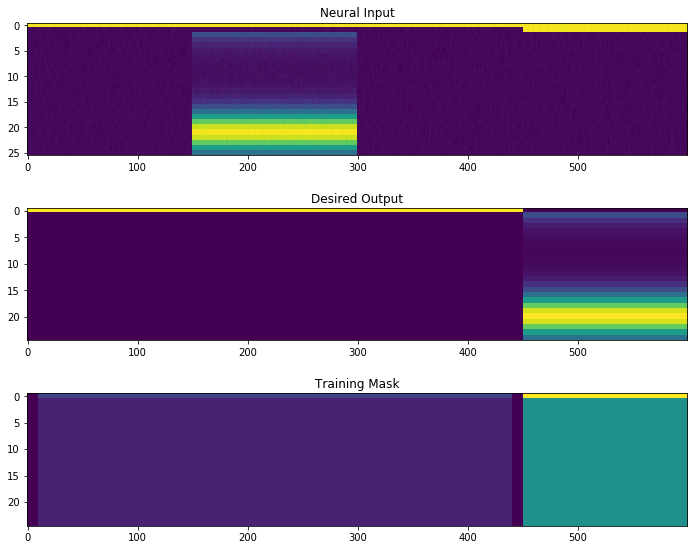

In [5]:
fig, axes = plt.subplots(3,1, figsize=(10,8))
TEST_TRIAL = np.random.randint(stimulus.batch_size)
axes[0].imshow(trial_info['neural_input'][:,TEST_TRIAL,:].T, aspect='auto'); axes[0].set_title("Neural Input")
axes[1].imshow(trial_info['desired_output'][:,TEST_TRIAL,:].T, aspect='auto'); axes[1].set_title("Desired Output")
axes[2].imshow(trial_info['mask'][:,TEST_TRIAL,:].T, aspect='auto'); axes[2].set_title("Training Mask")
fig.tight_layout(pad=2.0)
plt.show()

### 3.3. Options

#### 3.3.1. Task design

In [9]:
par['design'].update({'stim'    : (0,1.5),
                      'delay'   : (1.5,3.0),
                      'estim'   : (3.0,4.5),
                      'iti'     : (4.5,6.0)})
par = update_parameters(par)
stimulus = Stimulus(par)
trial_info = stimulus.generate_trial()

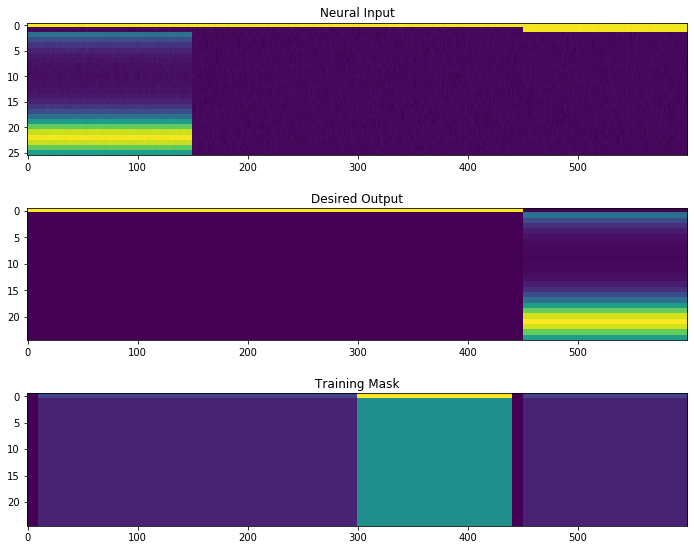

In [10]:
fig, axes = plt.subplots(3,1, figsize=(10,8))
TEST_TRIAL = np.random.randint(stimulus.batch_size)
axes[0].imshow(trial_info['neural_input'][:,TEST_TRIAL,:].T, aspect='auto'); axes[0].set_title("Neural Input")
axes[1].imshow(trial_info['desired_output'][:,TEST_TRIAL,:].T, aspect='auto'); axes[1].set_title("Desired Output")
axes[2].imshow(trial_info['mask'][:,TEST_TRIAL,:].T, aspect='auto'); axes[2].set_title("Training Mask") # a bug here
fig.tight_layout(pad=2.0)
plt.show()

#### 3.3.2. Training mask strength

In [11]:
par['design'].update({'stim'    : (0,1.5),
                      'delay'   : (1.5,3.0),
                      'estim'   : (3.0,4.5),
                      'iti'     : (4.5,6.0)})
par['mask'].update({'iti': 1., 'stim': 1., 'delay': 1., 'estim': 1.,
                    'rule_iti': 2., 'rule_stim': 2., 'rule_delay': 2., 'rule_estim': 2.})
par = update_parameters(par)
stimulus = Stimulus(par)
trial_info = stimulus.generate_trial()

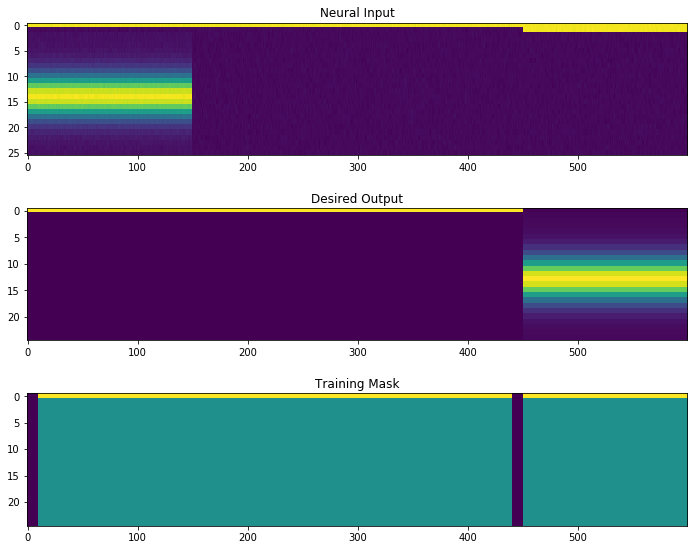

In [12]:
fig, axes = plt.subplots(3,1, figsize=(10,8))
TEST_TRIAL = np.random.randint(stimulus.batch_size)
axes[0].imshow(trial_info['neural_input'][:,TEST_TRIAL,:].T, aspect='auto'); axes[0].set_title("Neural Input")
axes[1].imshow(trial_info['desired_output'][:,TEST_TRIAL,:].T, aspect='auto'); axes[1].set_title("Desired Output")
axes[2].imshow(trial_info['mask'][:,TEST_TRIAL,:].T, aspect='auto'); axes[2].set_title("Training Mask")
fig.tight_layout(pad=2.0)
plt.show()

#### 3.3. Rule settings

In [25]:
par['input_rule'] = {'fixation': ((0, 1.5),(4.5,6.0)),
                     'response': (4.5,6.0),
                     'motor': (1.5,6.0)}
par['output_rule'] = {'fixation': (4,5, 6.0)}

par = update_parameters(par)
stimulus = Stimulus(par)
trial_info = stimulus.generate_trial()

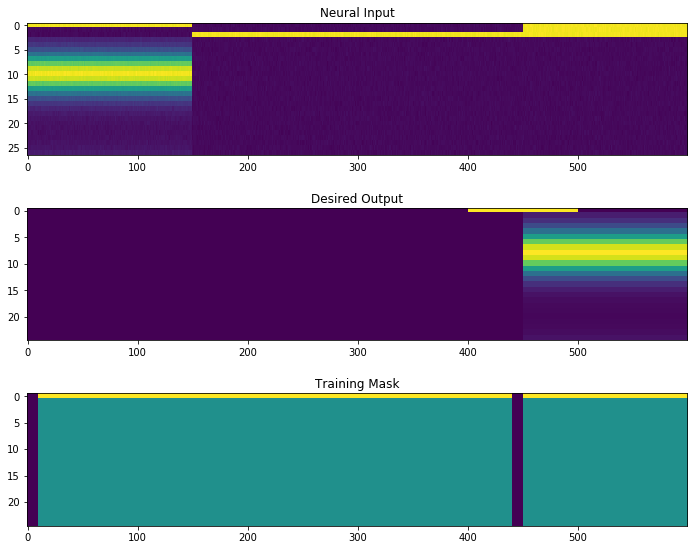

In [26]:
fig, axes = plt.subplots(3,1, figsize=(10,8))
TEST_TRIAL = np.random.randint(stimulus.batch_size)
axes[0].imshow(trial_info['neural_input'][:,TEST_TRIAL,:].T, aspect='auto'); axes[0].set_title("Neural Input")
axes[1].imshow(trial_info['desired_output'][:,TEST_TRIAL,:].T, aspect='auto'); axes[1].set_title("Desired Output") # a bug here
axes[2].imshow(trial_info['mask'][:,TEST_TRIAL,:].T, aspect='auto'); axes[2].set_title("Training Mask")
fig.tight_layout(pad=2.0)
plt.show()

#### 3.4. Other options

+ Basically you can change every parameter
+ But do not forget to use `par = update_parameters(par)`
+ `stimulus` should be redefined after `par = update_parameters(par)`

In [27]:
par['resp_decoding'] = 'conti' # default is `disc`
par['modular'] = True          # default is False
par['dt'] = 20                 # default is 10(ms)
par['dead'] = ((0,0.1),(4.4,4.5))
par['output_range'] = ((4.5,6.0))
par = update_parameters(par)

### 4. (Unnecessary) Training with det_rnn 

In [38]:
# Default settings
par['design'].update({'iti'    : (0,1.5),
                      'stim'   : (1.5,3.0),
                      'delay'   : (3.0,4.5),
                      'estim'     : (4.5,6.0)})

par['mask'].update({'iti': 1., 'stim': 1., 'delay': 1., 'estim': 5.,
                    'rule_iti': 2., 'rule_stim': 2., 'rule_delay': 2., 'rule_estim': 10.})

par['input_rule'] = {'fixation': (0, 6.0),
                     'response': (4.5, 6.0)}
par['output_rule'] = {'fixation': (0, 4.5)}

# (Unnecessary) Model settings
par['resp_decoding'] = 'disc'
par['loss_fun'] = 'mse' 

par = update_parameters(par)
stimulus = Stimulus()
trial_info = stimulus.generate_trial()

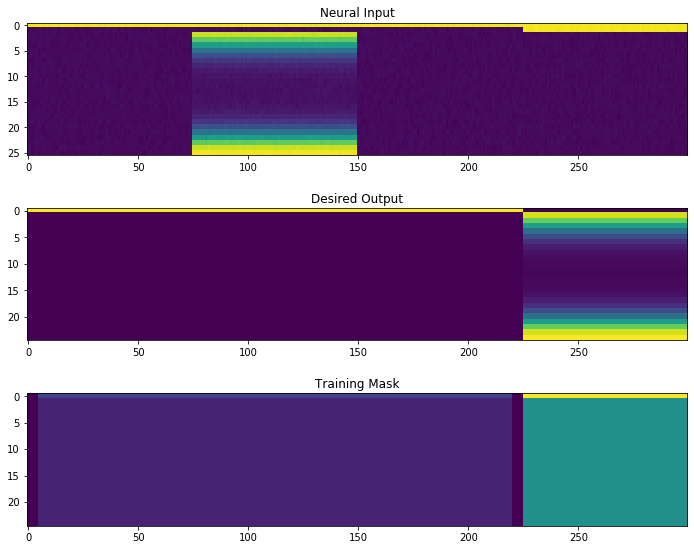

In [39]:
fig, axes = plt.subplots(3,1, figsize=(10,8))
TEST_TRIAL = np.random.randint(stimulus.batch_size)
axes[0].imshow(trial_info['neural_input'][:,TEST_TRIAL,:].T, aspect='auto'); axes[0].set_title("Neural Input")
axes[1].imshow(trial_info['desired_output'][:,TEST_TRIAL,:].T, aspect='auto'); axes[1].set_title("Desired Output")
axes[2].imshow(trial_info['mask'][:,TEST_TRIAL,:].T, aspect='auto'); axes[2].set_title("Training Mask")
fig.tight_layout(pad=2.0)
plt.show()

In [40]:
model = Model(par)
for iter in range(100):
    trial_info = stimulus.generate_trial()
    model(iter, trial_info['neural_input'], trial_info['desired_output'], trial_info['mask'])
    if iter % 10 == 0:
        model.print_results(iter)

Iter.    0 | Evaluaiton 0.0393 | Loss 0.1502 | Spike loss 0.0121
Iter.   10 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   20 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   30 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   40 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   50 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   60 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   70 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   80 | Evaluaiton 0.0000 | Loss nan | Spike loss nan
Iter.   90 | Evaluaiton 0.0000 | Loss nan | Spike loss nan


### 5. Future release

+ Fix bugs with regard to `task design` and `rule settings`
+ Refer to Yang et al.(2019)